In [2]:
import cobra
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd
from pandas import DataFrame
import plotly
import plotly.express as px
import plotly.graph_objs as go
import sklearn
import seaborn as sns
import scipy as sp

# access tomics and define overview function

In [3]:
%store -r t
t

,TSPAN6 (ENSG00000000003),TNMD (ENSG00000000005),DPM1 (ENSG00000000419),SCYL3 (ENSG00000000457),C1orf112 (ENSG00000000460),FGR (ENSG00000000938),CFH (ENSG00000000971),FUCA2 (ENSG00000001036),GCLC (ENSG00000001084),NFYA (ENSG00000001167),...,ENSG00000288714,ENSG00000288717,ENSG00000288718,ENSG00000288719,ENSG00000288720,ENSG00000288721,ENSG00000288722,ENSG00000288723,ENSG00000288724,ENSG00000288725
cell_line,,,,,,,,,,,,,,,,,,,,,
COV434_OVARY,2.946731,0.275007,6.527321,1.761285,3.160275,0.000000,5.204376,0.464668,3.044394,3.435629,...,0.411426,0.0,0.028569,0.014355,0.042644,0.757023,1.925999,0.000000,0.0,0.000000
59M_OVARY,3.460743,0.000000,6.399000,1.855990,3.374344,0.028569,3.261531,6.094869,5.290203,3.947666,...,0.028569,0.0,0.137504,0.000000,0.056584,0.978196,3.116032,0.000000,0.0,0.137504
NZOV9_OVARY,6.017922,0.000000,6.544578,3.047887,4.425594,0.000000,0.000000,4.412104,5.500165,4.053111,...,0.000000,0.0,0.739848,0.028569,0.056584,0.275007,2.443607,0.000000,0.0,0.000000
OAW42_OVARY,4.318317,0.000000,7.045377,1.831877,4.016140,0.014355,0.042644,6.321567,3.739848,4.559492,...,0.000000,0.0,0.056584,0.000000,0.000000,0.150560,2.929791,0.028569,0.0,0.000000
COV644_OVARY,4.152995,0.000000,6.044394,2.104337,3.852998,0.201634,0.773996,6.676662,3.993674,4.136684,...,0.000000,0.0,0.124328,0.056584,0.111031,0.443607,4.688740,0.757023,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RMUGS_OVARY,4.426265,0.000000,5.912650,2.114367,4.017031,0.000000,1.594549,5.535742,6.410748,3.005400,...,0.000000,0.0,0.028569,0.000000,0.150560,0.831877,4.978196,0.028569,0.0,0.070389
HEYA8_OVARY,3.718088,0.000000,7.133810,1.922198,3.787641,0.000000,0.475085,6.115824,4.336997,2.946731,...,0.000000,0.0,0.855990,0.014355,0.042644,0.575312,4.095924,0.000000,0.0,0.000000
PEO4_OVARY,4.288359,0.000000,6.011451,1.111031,2.735522,0.000000,1.704872,5.599913,2.773996,2.553361,...,0.000000,0.0,0.056584,0.000000,0.000000,0.097611,4.644433,0.000000,0.0,0.000000


In [8]:
t2 = t.transpose()

In [37]:
tomics = t2

<AxesSubplot:>

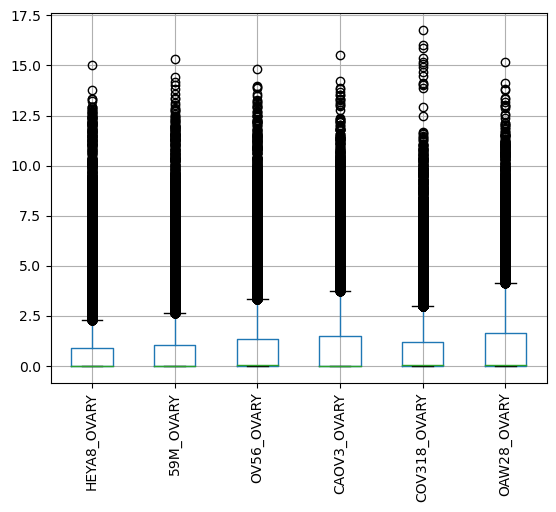

In [9]:
boxplot = t2.boxplot(column=['HEYA8_OVARY', '59M_OVARY', 'OV56_OVARY', 'CAOV3_OVARY', 'COV318_OVARY', 'OAW28_OVARY'])
plt.xticks(rotation=90)
boxplot

In [10]:
import statistics

In [38]:
def overview(col_name, dataset):
    median_low = statistics.median_low((dataset[col_name]).to_list())
    print('median low:',median_low)
    median = statistics.median((dataset[col_name]).to_list())
    print('median:',median)
    median_high = statistics.median_high((dataset[col_name]).to_list())
    print('median high:',median_high)
    mean = statistics.mean((dataset[col_name]).to_list())
    print('mean:',mean)
    mode = statistics.mode((dataset[col_name]).to_list())
    print('mode:',mode)
    quantiles = statistics.quantiles((dataset[col_name]).to_list())
    print('quantiles:',quantiles)
    variance = statistics.variance((dataset[col_name]).to_list())
    print('variance:',variance)

In [39]:
overview('HEYA8_OVARY',tomics)

median low: 0.0
median: 0.0
median high: 0.0
mean: 1.0147176891849947
mode: 0.0
quantiles: [0.0, 0.0, 0.918386234446348]
variance: 3.74800445648681


# access proteomics

In [154]:
pomics = pd.read_csv(r'/Users/katemeeson/august_2022/data_3.csv')
pomics

,Unnamed: 0,Unnamed: 1,S12A2_HUMAN,KDM1A_HUMAN,SRP14_HUMAN,SOGA1_HUMAN,NU133_HUMAN,RL4_HUMAN,FUBP2_HUMAN,FUBP3_HUMAN,...,VEZF1_HUMAN,CAPZB_HUMAN.1,SP1_HUMAN,SP4_HUMAN,SP3_HUMAN,NEXN_HUMAN,RM18_HUMAN,CJ032_HUMAN,SF3B5_HUMAN,RM42_HUMAN
0,MDAMB468_BREAST_TenPx01,MDAMB468_BREAST_TenPx01,2.111348,0.379683,-0.186838,0.059854,-0.146176,0.135232,-0.190885,-0.063952,...,-0.403739,-0.153501,-0.148834,0.173229,0.051509,-0.976917,-0.078762,-0.330626,0.304715,-0.343869
1,SH4_SKIN_TenPx01,SH4_SKIN_TenPx01,0.070468,-0.283538,0.197277,0.042464,-0.183708,0.111615,0.109827,-0.155310,...,0.240627,-0.196309,-0.286421,-0.990543,-0.145354,-1.457410,0.176580,0.368040,-0.174971,-0.017864
2,AU565_BREAST_TenPx01,AU565_BREAST_TenPx01,-0.463928,0.191211,-0.409423,0.035922,-0.080056,-0.054070,-0.487110,-0.357357,...,-0.403138,-0.099788,0.275052,-0.613352,-0.216764,-0.993017,0.293515,-0.856616,-0.277952,0.226371
3,KMRC1_KIDNEY_TenPx01,KMRC1_KIDNEY_TenPx01,-0.883645,-0.595606,-0.070153,-0.064167,-0.195807,0.315089,-0.256803,-0.296321,...,-0.562462,0.031485,-0.617817,-0.858956,-0.230409,1.258161,-0.342146,0.171847,-0.469880,-0.576579
4,CAL51_BREAST_TenPx01,CAL51_BREAST_TenPx01,0.788565,0.391243,0.766739,-0.250695,0.513984,-0.140021,0.194832,0.185674,...,0.877637,-0.360928,0.720877,0.253705,0.592139,0.388330,-0.114302,0.201265,0.376778,-0.123126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,FADU_UPPER_AERODIGESTIVE_TRACT_TenPx24,FADU_UPPER_AERODIGESTIVE_TRACT_TenPx24,-0.071063,-0.817245,0.119898,-0.400784,-0.741328,-1.236118,0.734045,0.635489,...,0.490925,-0.350087,0.918010,0.122607,0.952314,-0.493886,0.006167,0.588836,0.973730,1.083772
374,KP4_PANCREAS_TenPx24,KP4_PANCREAS_TenPx24,0.702306,-0.790010,-1.139911,-0.107880,-0.313100,-0.641682,1.030157,1.362878,...,-0.296511,-0.070814,0.436107,1.593698,1.514416,0.955601,-0.100606,1.611483,1.392937,0.988600
375,MONOMAC6_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE_Te...,MONOMAC6_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE_Te...,-1.395878,0.929522,-0.029949,-0.912453,0.480380,0.862004,-0.122780,-0.228800,...,0.026295,-0.249727,0.068060,-0.312835,-0.508589,-0.929248,-0.277244,-0.509805,-0.661874,-0.392276
376,OVCAR8_OVARY_TenPx24,OVCAR8_OVARY_TenPx24,-1.165032,-0.828736,-0.686840,0.134896,-0.450290,-0.239972,0.333098,0.531633,...,-0.037819,0.120031,-0.298931,0.231821,-0.668094,2.259293,-0.535367,-0.487932,0.036873,-0.261739


In [155]:
OC_indexes = []
for n in range(len(pomics['Unnamed: 0'])):
    if 'OVARY' in pomics.iloc[n,0]:
        OC_indexes.append(n)
indexes_to_drop = []
for n in range(378):
    if n not in OC_indexes:
        indexes_to_drop.append(n)        
pomics_2 = pomics.drop(pomics.index[indexes_to_drop])
pomics_3 = pomics_2.drop(['Unnamed: 1'], axis=1)
ovarian_lines = ['CAOV3_OVARY','COV362_OVARY','TYKNU_OVARY','OVCAR4_OVARY','SNU119_OVARY','FUOV1_OVARY','IGROV1_OVARY','HEYA8_OVARY','JHOS2_OVARY','NIHOVCAR3_OVARY','OV56_OVARY','OVSAHO_OVARY','RMUGS_OVARY','OV90_OVARY','A2780_OVARY','KURAMOCHI_OVARY','OVCAR8_OVARY']
pomics_3['cell_line'] = ovarian_lines
pomics_4 = pomics_3.drop(['Unnamed: 0'], axis=1)
pomics_5 = pomics_4.set_index(['cell_line'])
pomics = pomics_5

In [51]:
pomics.index

Index(['CAOV3_OVARY', 'COV362_OVARY', 'TYKNU_OVARY', 'OVCAR4_OVARY',
       'SNU119_OVARY', 'FUOV1_OVARY', 'IGROV1_OVARY', 'HEYA8_OVARY',
       'JHOS2_OVARY', 'NIHOVCAR3_OVARY', 'OV56_OVARY', 'OVSAHO_OVARY',
       'RMUGS_OVARY', 'OV90_OVARY', 'A2780_OVARY', 'KURAMOCHI_OVARY',
       'OVCAR8_OVARY'],
      dtype='object', name='cell_line')

In [54]:
pomics = pomics.transpose()

In [62]:
print('pomics:')
print(overview('HEYA8_OVARY',pomics))
print('\n')
print('tomics:')
print(overview('HEYA8_OVARY',tomics))

pomics:
median low: 0.06055345
median: 0.06055345
median high: 0.06055345
mean: 0.07606057066504948
mode: -0.966056923
quantiles: [-0.328853222, 0.06055345, 0.438228215]
variance: 0.5684259924961538
None


tomics:
median low: 0.0
median: 0.0
median high: 0.0
mean: 1.0147176891849947
mode: 0.0
quantiles: [0.0, 0.0, 0.918386234446348]
variance: 3.74800445648681
None


<AxesSubplot:>

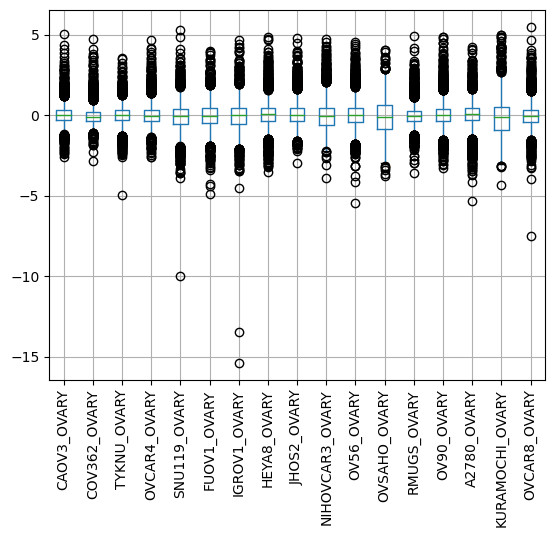

In [68]:
boxplot = pomics.boxplot()
plt.xticks(rotation=90)
plt.savefig('pomics_spread.png',dpi=300,bbox_inches='tight')
boxplot

<AxesSubplot:>

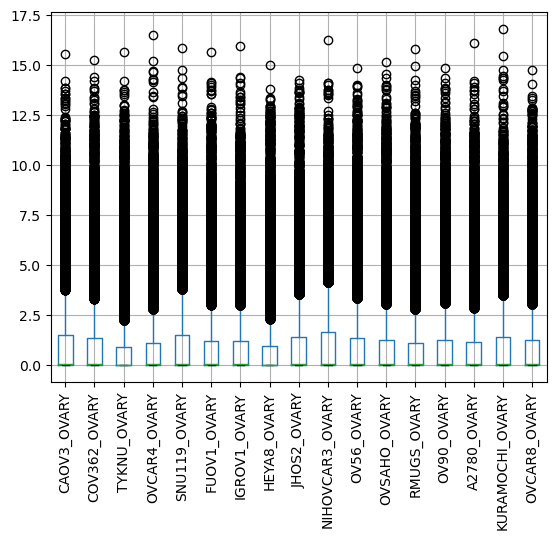

In [69]:
boxplot = tomics.boxplot(column = ['CAOV3_OVARY','COV362_OVARY','TYKNU_OVARY','OVCAR4_OVARY','SNU119_OVARY','FUOV1_OVARY','IGROV1_OVARY','HEYA8_OVARY','JHOS2_OVARY','NIHOVCAR3_OVARY','OV56_OVARY','OVSAHO_OVARY','RMUGS_OVARY','OV90_OVARY','A2780_OVARY','KURAMOCHI_OVARY','OVCAR8_OVARY'])
plt.xticks(rotation=90)
plt.savefig('tomics_spread.png',dpi=300,bbox_inches='tight')
boxplot

In [132]:
pomics

cell_line,CAOV3_OVARY,COV362_OVARY,TYKNU_OVARY,OVCAR4_OVARY,SNU119_OVARY,FUOV1_OVARY,IGROV1_OVARY,HEYA8_OVARY,JHOS2_OVARY,NIHOVCAR3_OVARY,OV56_OVARY,OVSAHO_OVARY,RMUGS_OVARY,OV90_OVARY,A2780_OVARY,KURAMOCHI_OVARY,OVCAR8_OVARY
S12A2_HUMAN,0.697643,-0.576200,-0.467575,0.676388,-0.648294,-1.137375,-0.171731,-0.966057,0.830842,1.262304,0.146497,0.287238,-0.581180,1.156182,0.103439,-1.073721,-1.165032
KDM1A_HUMAN,0.009925,0.007450,-0.183340,-0.120693,0.837186,0.511780,0.121767,-0.772837,-0.374959,0.513282,0.113627,0.567296,-0.193377,0.204563,0.360932,0.706483,-0.828736
SRP14_HUMAN,-0.574020,-0.196959,0.126376,-0.718341,-0.066834,-0.493287,0.111216,-0.404935,-0.016129,-0.309114,-0.202098,0.858236,-0.002249,-0.406602,0.476098,-0.182718,-0.686840
SOGA1_HUMAN,0.178261,-0.381734,-0.518141,1.268040,-0.595932,-0.554983,-1.259058,-0.319358,0.067437,0.704417,-1.219654,0.107184,0.320838,-1.017758,-0.116709,-0.530042,0.134896
NU133_HUMAN,-0.286144,-0.104525,0.046955,-0.474546,0.151583,0.199323,0.633765,-0.490078,-0.209660,-0.002526,0.354555,0.789124,0.171849,-0.215083,0.091552,0.431738,-0.450290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NEXN_HUMAN,-0.090339,0.530260,-0.757688,4.150997,1.858394,-0.266349,-1.750220,1.634205,0.836853,-1.283944,1.330227,1.607322,-0.447752,-0.204352,0.570428,4.189483,2.259293
RM18_HUMAN,0.108490,0.236321,-0.142767,-0.298355,0.042502,-0.002485,0.331552,0.124881,-0.283348,0.634431,0.249225,0.880781,-0.515390,0.650630,0.019639,0.190088,-0.535367
CJ032_HUMAN,0.351236,0.035910,-0.459508,-0.387866,0.093416,0.917893,-0.001985,0.663362,0.249061,0.324781,-0.771999,0.314910,-0.181669,-0.249019,0.729785,0.035073,-0.487932
SF3B5_HUMAN,0.001087,0.119064,-0.120622,0.148244,0.057240,0.478057,0.378716,0.025245,-0.272687,0.708759,-0.477772,0.673283,-0.489300,-0.356699,-0.090579,0.393638,0.036873


In [142]:
for n in range(len(pomics)):
    protein_values = (pomics.iloc[n,:]).to_list()
    for p in protein_values:
        if p < -5:
            print(pomics.iloc[n,:])

cell_line
CAOV3_OVARY       -0.719959
COV362_OVARY       1.478931
TYKNU_OVARY       -1.302435
OVCAR4_OVARY       0.638862
SNU119_OVARY      -9.986999
FUOV1_OVARY        0.574642
IGROV1_OVARY       1.051418
HEYA8_OVARY        1.692708
JHOS2_OVARY        1.159411
NIHOVCAR3_OVARY   -1.082583
OV56_OVARY         3.074095
OVSAHO_OVARY      -2.331085
RMUGS_OVARY        0.816632
OV90_OVARY        -1.429296
A2780_OVARY        3.016548
KURAMOCHI_OVARY    1.457747
OVCAR8_OVARY       2.781540
Name: Q6ZN40_HUMAN, dtype: float64
cell_line
CAOV3_OVARY        3.400795
COV362_OVARY       2.207198
TYKNU_OVARY       -1.072536
OVCAR4_OVARY       1.123730
SNU119_OVARY      -1.063594
FUOV1_OVARY       -0.805441
IGROV1_OVARY       2.325970
HEYA8_OVARY        2.256315
JHOS2_OVARY        0.497679
NIHOVCAR3_OVARY   -1.282464
OV56_OVARY         3.496571
OVSAHO_OVARY      -1.259608
RMUGS_OVARY       -1.922587
OV90_OVARY        -1.962254
A2780_OVARY        3.363427
KURAMOCHI_OVARY    0.872392
OVCAR8_OVARY      -7.

In [144]:
pomics = pomics.transpose()

In [162]:
pomics1 = pomics.drop(['1B45_HUMAN','CO4A1_HUMAN','LYPL1_HUMAN','LSP1_HUMAN','DRA_HUMAN'],axis=1)
pomics1

,S12A2_HUMAN,KDM1A_HUMAN,SRP14_HUMAN,SOGA1_HUMAN,NU133_HUMAN,RL4_HUMAN,FUBP2_HUMAN,FUBP3_HUMAN,FUBP1_HUMAN,MMP14_HUMAN,...,VEZF1_HUMAN,CAPZB_HUMAN.1,SP1_HUMAN,SP4_HUMAN,SP3_HUMAN,NEXN_HUMAN,RM18_HUMAN,CJ032_HUMAN,SF3B5_HUMAN,RM42_HUMAN
cell_line,,,,,,,,,,,,,,,,,,,,,
CAOV3_OVARY,0.697643,0.009925,-0.574020,0.178261,-0.286144,-0.116591,-0.406977,-0.125347,0.382905,-0.420569,...,-0.113769,-0.095774,0.253674,-0.278100,0.077004,-0.090339,0.108490,0.351236,0.001087,0.107655
COV362_OVARY,-0.576200,0.007450,-0.196959,-0.381734,-0.104525,-0.183259,-0.205265,0.011734,0.153052,-1.182370,...,0.146127,0.631741,0.040602,-0.194423,0.430918,0.530260,0.236321,0.035910,0.119064,0.199670
TYKNU_OVARY,-0.467575,-0.183340,0.126376,-0.518141,0.046955,0.587666,-0.243615,-0.502063,-0.118627,1.235853,...,-0.707460,0.547182,-0.505376,-0.051802,-0.023245,-0.757688,-0.142767,-0.459508,-0.120622,-0.434604
OVCAR4_OVARY,0.676388,-0.120693,-0.718341,1.268040,-0.474546,-0.191642,0.325719,-0.332027,0.256438,-1.439273,...,-0.424909,-0.071308,0.168781,-0.311952,-0.097562,4.150997,-0.298355,-0.387866,0.148244,-0.155841
SNU119_OVARY,-0.648294,0.837186,-0.066834,-0.595932,0.151583,0.128698,-0.089561,-0.337770,0.243853,-1.172738,...,-0.267302,0.277996,0.392633,0.626003,0.289890,1.858394,0.042502,0.093416,0.057240,-0.018211
FUOV1_OVARY,-1.137375,0.511780,-0.493287,-0.554983,0.199323,-0.637933,0.490498,0.309166,0.918420,-1.923983,...,0.477351,0.086648,0.740052,0.885464,0.457326,-0.266349,-0.002485,0.917893,0.478057,0.391953
IGROV1_OVARY,-0.171731,0.121767,0.111216,-1.259058,0.633765,-0.000672,0.571120,0.234215,-0.354736,0.506709,...,1.267914,-0.465938,0.695508,0.863175,0.212162,-1.750220,0.331552,-0.001985,0.378716,0.132566
HEYA8_OVARY,-0.966057,-0.772837,-0.404935,-0.319358,-0.490078,0.820523,0.276327,0.717663,1.026950,0.685141,...,-0.469486,0.388638,0.292705,0.379647,-0.012627,1.634205,0.124881,0.663362,0.025245,0.529587
JHOS2_OVARY,0.830842,-0.374959,-0.016129,0.067437,-0.209660,-0.047014,-0.126932,0.271636,0.112030,0.102325,...,0.061767,0.515933,-0.649939,-0.359888,-0.359780,0.836853,-0.283348,0.249061,-0.272687,-0.926651


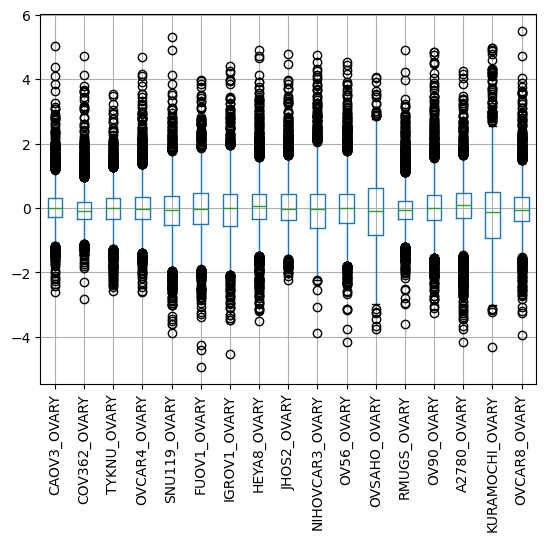

In [163]:
pomics = pomics1.transpose()
pomics.boxplot()
plt.xticks(rotation=90)
plt.savefig('pomics_spread.png',dpi=300,bbox_inches='tight')
plt.show()

In [167]:
pomics

cell_line,CAOV3_OVARY,COV362_OVARY,TYKNU_OVARY,OVCAR4_OVARY,SNU119_OVARY,FUOV1_OVARY,IGROV1_OVARY,HEYA8_OVARY,JHOS2_OVARY,NIHOVCAR3_OVARY,OV56_OVARY,OVSAHO_OVARY,RMUGS_OVARY,OV90_OVARY,A2780_OVARY,KURAMOCHI_OVARY,OVCAR8_OVARY
S12A2_HUMAN,0.697643,-0.576200,-0.467575,0.676388,-0.648294,-1.137375,-0.171731,-0.966057,0.830842,1.262304,0.146497,0.287238,-0.581180,1.156182,0.103439,-1.073721,-1.165032
KDM1A_HUMAN,0.009925,0.007450,-0.183340,-0.120693,0.837186,0.511780,0.121767,-0.772837,-0.374959,0.513282,0.113627,0.567296,-0.193377,0.204563,0.360932,0.706483,-0.828736
SRP14_HUMAN,-0.574020,-0.196959,0.126376,-0.718341,-0.066834,-0.493287,0.111216,-0.404935,-0.016129,-0.309114,-0.202098,0.858236,-0.002249,-0.406602,0.476098,-0.182718,-0.686840
SOGA1_HUMAN,0.178261,-0.381734,-0.518141,1.268040,-0.595932,-0.554983,-1.259058,-0.319358,0.067437,0.704417,-1.219654,0.107184,0.320838,-1.017758,-0.116709,-0.530042,0.134896
NU133_HUMAN,-0.286144,-0.104525,0.046955,-0.474546,0.151583,0.199323,0.633765,-0.490078,-0.209660,-0.002526,0.354555,0.789124,0.171849,-0.215083,0.091552,0.431738,-0.450290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NEXN_HUMAN,-0.090339,0.530260,-0.757688,4.150997,1.858394,-0.266349,-1.750220,1.634205,0.836853,-1.283944,1.330227,1.607322,-0.447752,-0.204352,0.570428,4.189483,2.259293
RM18_HUMAN,0.108490,0.236321,-0.142767,-0.298355,0.042502,-0.002485,0.331552,0.124881,-0.283348,0.634431,0.249225,0.880781,-0.515390,0.650630,0.019639,0.190088,-0.535367
CJ032_HUMAN,0.351236,0.035910,-0.459508,-0.387866,0.093416,0.917893,-0.001985,0.663362,0.249061,0.324781,-0.771999,0.314910,-0.181669,-0.249019,0.729785,0.035073,-0.487932
SF3B5_HUMAN,0.001087,0.119064,-0.120622,0.148244,0.057240,0.478057,0.378716,0.025245,-0.272687,0.708759,-0.477772,0.673283,-0.489300,-0.356699,-0.090579,0.393638,0.036873


In [173]:
caov3 = []
cov362 = []
tyknu = []
ovcar4 = []
snu119 = []
fuov1 = []
igrov1 = []
heya8 = []
jhos2 = []
nihovcar3 = []
ov56 = []
ovsaho = []
rmugs = []
ov90 = []
a2780 = []
kuramochi = []
ovcar8 = []
column_names = ['CAOV3_OVARY','COV362_OVARY','TYKNU_OVARY','OVCAR4_OVARY','SNU119_OVARY','FUOV1_OVARY','IGROV1_OVARY','HEYA8_OVARY','JHOS2_OVARY','NIHOVCAR3_OVARY','OV56_OVARY','OVSAHO_OVARY','RMUGS_OVARY','OV90_OVARY','A2780_OVARY','KURAMOCHI_OVARY','OVCAR8_OVARY']
pomics2 = pd.DataFrame(columns = column_names)

for n in range(len(pomics['CAOV3_OVARY'])):
    caov3.append(pomics.iloc[n,0]+6.5)
pomics2['CAOV3_OVARY'] = caov3

for n in range(len(pomics['COV362_OVARY'])):
    cov362.append(pomics.iloc[n,1]+6.5)
pomics2['COV362_OVARY'] = cov362

for n in range(len(pomics['TYKNU_OVARY'])):
    tyknu.append(pomics.iloc[n,2]+6.5)
pomics2['TYKNU_OVARY'] = tyknu

for n in range(len(pomics['OVCAR4_OVARY'])):
    ovcar4.append(pomics.iloc[n,3]+6.5)
pomics2['OVCAR4_OVARY'] = ovcar4

for n in range(len(pomics['OVCAR4_OVARY'])):
    snu119.append(pomics.iloc[n,4]+6.5)
pomics2['SNU119_OVARY'] = snu119

for n in range(len(pomics['OVCAR4_OVARY'])):
    fuov1.append(pomics.iloc[n,5]+6.5)
pomics2['FUOV1_OVARY'] = fuov1

for n in range(len(pomics['OVCAR4_OVARY'])):
    igrov1.append(pomics.iloc[n,6]+6.5)
pomics2['IGROV1_OVARY'] = igrov1

for n in range(len(pomics['OVCAR4_OVARY'])):
    heya8.append(pomics.iloc[n,7]+6.5)
pomics2['HEYA8_OVARY'] = heya8

for n in range(len(pomics['OVCAR4_OVARY'])):
    jhos2.append(pomics.iloc[n,8]+6.5)
pomics2['JHOS2_OVARY'] = jhos2

for n in range(len(pomics['OVCAR4_OVARY'])):
    nihovcar3.append(pomics.iloc[n,9]+6.5)
pomics2['NIHOVCAR3_OVARY'] = nihovcar3

for n in range(len(pomics['OVCAR4_OVARY'])):
    ov56.append(pomics.iloc[n,10]+6.5)
pomics2['OV56_OVARY'] = ov56

for n in range(len(pomics['OVCAR4_OVARY'])):
    ovsaho.append(pomics.iloc[n,11]+6.5)
pomics2['OVSAHO_OVARY'] = ovsaho

for n in range(len(pomics['OVCAR4_OVARY'])):
    rmugs.append(pomics.iloc[n,12]+6.5)
pomics2['RMUGS_OVARY'] = rmugs

for n in range(len(pomics['OVCAR4_OVARY'])):
    ov90.append(pomics.iloc[n,13]+6.5)
pomics2['OV90_OVARY'] = ov90

for n in range(len(pomics['OVCAR4_OVARY'])):
    a2780.append(pomics.iloc[n,14]+6.5)
pomics2['A2780_OVARY'] = a2780

for n in range(len(pomics['OVCAR4_OVARY'])):
    kuramochi.append(pomics.iloc[n,15]+6.5)
pomics2['KURAMOCHI_OVARY'] = kuramochi

for n in range(len(pomics['OVCAR4_OVARY'])):
    ovcar8.append(pomics.iloc[n,16]+6.5)
pomics2['OVCAR8_OVARY'] = ovcar8

In [174]:
pomics2

,CAOV3_OVARY,COV362_OVARY,TYKNU_OVARY,OVCAR4_OVARY,SNU119_OVARY,FUOV1_OVARY,IGROV1_OVARY,HEYA8_OVARY,JHOS2_OVARY,NIHOVCAR3_OVARY,OV56_OVARY,OVSAHO_OVARY,RMUGS_OVARY,OV90_OVARY,A2780_OVARY,KURAMOCHI_OVARY,OVCAR8_OVARY
0,7.197643,5.923800,6.032425,7.176388,5.851706,5.362625,6.328269,5.533943,7.330842,7.762304,6.646497,6.787238,5.918820,7.656182,6.603439,5.426279,5.334968
1,6.509925,6.507450,6.316660,6.379307,7.337186,7.011780,6.621767,5.727163,6.125041,7.013282,6.613627,7.067296,6.306623,6.704563,6.860932,7.206483,5.671264
2,5.925980,6.303041,6.626376,5.781659,6.433166,6.006713,6.611216,6.095065,6.483871,6.190886,6.297902,7.358236,6.497751,6.093398,6.976098,6.317282,5.813160
3,6.678261,6.118266,5.981859,7.768040,5.904068,5.945017,5.240942,6.180642,6.567437,7.204417,5.280346,6.607184,6.820838,5.482242,6.383291,5.969958,6.634896
4,6.213856,6.395475,6.546955,6.025454,6.651583,6.699323,7.133765,6.009922,6.290340,6.497474,6.854555,7.289124,6.671849,6.284917,6.591552,6.931738,6.049710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5142,6.409661,7.030260,5.742312,10.650997,8.358394,6.233651,4.749780,8.134205,7.336853,5.216056,7.830227,8.107322,6.052248,6.295648,7.070428,10.689483,8.759293
5143,6.608490,6.736321,6.357233,6.201645,6.542502,6.497515,6.831552,6.624881,6.216652,7.134431,6.749225,7.380781,5.984610,7.150630,6.519639,6.690088,5.964633
5144,6.851236,6.535910,6.040492,6.112134,6.593416,7.417893,6.498015,7.163362,6.749061,6.824781,5.728001,6.814910,6.318331,6.250981,7.229785,6.535073,6.012068
5145,6.501087,6.619064,6.379378,6.648244,6.557240,6.978057,6.878716,6.525245,6.227313,7.208759,6.022228,7.173283,6.010700,6.143301,6.409421,6.893638,6.536873


In [179]:
pomics2['cell_line'] = (pomics.index).to_list()
pomics2 = pomics2.set_index('cell_line')

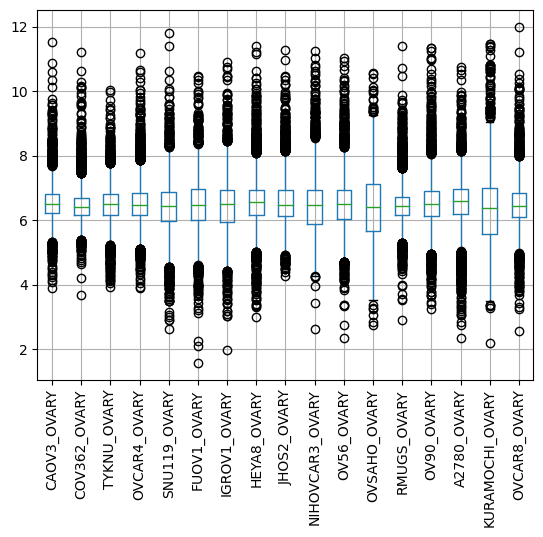

In [180]:
pomics2.boxplot()
plt.xticks(rotation=90)
plt.savefig('pomics2_spread.png',dpi=300,bbox_inches='tight')
plt.show()

In [182]:
pomics2.to_csv('pomics2.csv')

In [184]:
for n in range(len(pomics2['FUOV1_OVARY'])):
    if pomics2['FUOV1_OVARY'][n] < 2:
        print(pomics2['FUOV1_OVARY'][n])

1.574212589


In [185]:
6.5-1.57

4.93

In [ ]:
#can afford to take off 1.57 from the constant previously added
#remove on excel file where I am converting IDs
#replot after
#means total added is 6.5-1.57 = 4.93

# convert ids in pomics

In [224]:
ids = pd.read_csv(r'/Users/katemeeson/Downloads/converted_ids (1).csv')
ids

,ensembl,gene
0,ENSG00000230124,ACBD6_HUMAN
1,ENSG00000075624,ACTB_HUMAN
2,ENSG00000156110,ADK_HUMAN
3,ENSG00000262327,AGK_HUMAN
4,ENSG00000105127,AKAP8_HUMAN
...,...,...
2406,ENSG00000119801,YPEL5_HUMAN
2407,ENSG00000181472,ZBTB2_HUMAN
2408,ENSG00000056097,ZFR_HUMAN
2409,ENSG00000165156,ZHX1_HUMAN


In [225]:
pomics2['cell_line_2'] = (pomics2.index).to_list()
pomics2

,CAOV3_OVARY,COV362_OVARY,TYKNU_OVARY,OVCAR4_OVARY,SNU119_OVARY,FUOV1_OVARY,IGROV1_OVARY,HEYA8_OVARY,JHOS2_OVARY,NIHOVCAR3_OVARY,OV56_OVARY,OVSAHO_OVARY,RMUGS_OVARY,OV90_OVARY,A2780_OVARY,KURAMOCHI_OVARY,OVCAR8_OVARY,cell_line_2
cell_line,,,,,,,,,,,,,,,,,,
S12A2_HUMAN,7.197643,5.923800,6.032425,7.176388,5.851706,5.362625,6.328269,5.533943,7.330842,7.762304,6.646497,6.787238,5.918820,7.656182,6.603439,5.426279,5.334968,S12A2_HUMAN
KDM1A_HUMAN,6.509925,6.507450,6.316660,6.379307,7.337186,7.011780,6.621767,5.727163,6.125041,7.013282,6.613627,7.067296,6.306623,6.704563,6.860932,7.206483,5.671264,KDM1A_HUMAN
SRP14_HUMAN,5.925980,6.303041,6.626376,5.781659,6.433166,6.006713,6.611216,6.095065,6.483871,6.190886,6.297902,7.358236,6.497751,6.093398,6.976098,6.317282,5.813160,SRP14_HUMAN
SOGA1_HUMAN,6.678261,6.118266,5.981859,7.768040,5.904068,5.945017,5.240942,6.180642,6.567437,7.204417,5.280346,6.607184,6.820838,5.482242,6.383291,5.969958,6.634896,SOGA1_HUMAN
NU133_HUMAN,6.213856,6.395475,6.546955,6.025454,6.651583,6.699323,7.133765,6.009922,6.290340,6.497474,6.854555,7.289124,6.671849,6.284917,6.591552,6.931738,6.049710,NU133_HUMAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NEXN_HUMAN,6.409661,7.030260,5.742312,10.650997,8.358394,6.233651,4.749780,8.134205,7.336853,5.216056,7.830227,8.107322,6.052248,6.295648,7.070428,10.689483,8.759293,NEXN_HUMAN
RM18_HUMAN,6.608490,6.736321,6.357233,6.201645,6.542502,6.497515,6.831552,6.624881,6.216652,7.134431,6.749225,7.380781,5.984610,7.150630,6.519639,6.690088,5.964633,RM18_HUMAN
CJ032_HUMAN,6.851236,6.535910,6.040492,6.112134,6.593416,7.417893,6.498015,7.163362,6.749061,6.824781,5.728001,6.814910,6.318331,6.250981,7.229785,6.535073,6.012068,CJ032_HUMAN


In [226]:
gene_list = (ids['gene']).to_list()

In [227]:
genes_to_scan = (pomics2['cell_line_2']).to_list()

In [228]:
indexes_to_remove = []
for n in range(len(genes_to_scan)):
    if genes_to_scan[n] not in gene_list:
        indexes_to_remove.append(n)
pomics3 = pomics2.drop(pomics2.index[indexes_to_remove])
pomics3

,CAOV3_OVARY,COV362_OVARY,TYKNU_OVARY,OVCAR4_OVARY,SNU119_OVARY,FUOV1_OVARY,IGROV1_OVARY,HEYA8_OVARY,JHOS2_OVARY,NIHOVCAR3_OVARY,OV56_OVARY,OVSAHO_OVARY,RMUGS_OVARY,OV90_OVARY,A2780_OVARY,KURAMOCHI_OVARY,OVCAR8_OVARY,cell_line_2
cell_line,,,,,,,,,,,,,,,,,,
KDM1A_HUMAN,6.509925,6.507450,6.316660,6.379307,7.337186,7.011780,6.621767,5.727163,6.125041,7.013282,6.613627,7.067296,6.306623,6.704563,6.860932,7.206483,5.671264,KDM1A_HUMAN
SRP14_HUMAN,5.925980,6.303041,6.626376,5.781659,6.433166,6.006713,6.611216,6.095065,6.483871,6.190886,6.297902,7.358236,6.497751,6.093398,6.976098,6.317282,5.813160,SRP14_HUMAN
SOGA1_HUMAN,6.678261,6.118266,5.981859,7.768040,5.904068,5.945017,5.240942,6.180642,6.567437,7.204417,5.280346,6.607184,6.820838,5.482242,6.383291,5.969958,6.634896,SOGA1_HUMAN
FUBP3_HUMAN,6.374653,6.511734,5.997937,6.167973,6.162230,6.809166,6.734215,7.217663,6.771636,7.030119,5.997407,6.244572,6.862755,6.498318,6.888998,7.082289,7.031633,FUBP3_HUMAN
FUBP1_HUMAN,6.882905,6.653052,6.381373,6.756438,6.743853,7.418420,6.145264,7.526950,6.612030,7.035547,6.094597,7.084204,7.335760,6.601333,6.829025,7.067792,6.092497,FUBP1_HUMAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SP1_HUMAN,6.753674,6.540602,5.994624,6.668781,6.892633,7.240052,7.195508,6.792705,5.850061,6.718723,5.643980,6.561937,6.180079,5.350293,6.728370,6.814901,6.201069,SP1_HUMAN
SP4_HUMAN,6.221900,6.305577,6.448198,6.188048,7.126003,7.385464,7.363175,6.879647,6.140112,6.721980,5.245134,5.873146,6.065782,5.578091,5.914689,8.268587,6.731821,SP4_HUMAN
SP3_HUMAN,6.577004,6.930918,6.476755,6.402438,6.789890,6.957326,6.712162,6.487373,6.140220,6.135180,5.824854,6.313680,6.123594,5.965122,6.914305,7.303922,5.831906,SP3_HUMAN


In [229]:
to_add = []
ens_ids = ids['ensembl']
p_genes = pomics3['cell_line_2']
for n in range(len(p_genes)):
    for num in range(len(gene_list)):
        if p_genes[n] == gene_list[num]:
            to_add.append(ens_ids[num])
print(len(to_add))

2395


In [232]:
pomics3['ensembl'] = to_add
pomics3 = pomics3.set_index('ensembl')
pomics3

,CAOV3_OVARY,COV362_OVARY,TYKNU_OVARY,OVCAR4_OVARY,SNU119_OVARY,FUOV1_OVARY,IGROV1_OVARY,HEYA8_OVARY,JHOS2_OVARY,NIHOVCAR3_OVARY,OV56_OVARY,OVSAHO_OVARY,RMUGS_OVARY,OV90_OVARY,A2780_OVARY,KURAMOCHI_OVARY,OVCAR8_OVARY,cell_line_2
ensembl,,,,,,,,,,,,,,,,,,
ENSG00000004487,6.509925,6.507450,6.316660,6.379307,7.337186,7.011780,6.621767,5.727163,6.125041,7.013282,6.613627,7.067296,6.306623,6.704563,6.860932,7.206483,5.671264,KDM1A_HUMAN
ENSG00000140319,5.925980,6.303041,6.626376,5.781659,6.433166,6.006713,6.611216,6.095065,6.483871,6.190886,6.297902,7.358236,6.497751,6.093398,6.976098,6.317282,5.813160,SRP14_HUMAN
ENSG00000149639,6.678261,6.118266,5.981859,7.768040,5.904068,5.945017,5.240942,6.180642,6.567437,7.204417,5.280346,6.607184,6.820838,5.482242,6.383291,5.969958,6.634896,SOGA1_HUMAN
ENSG00000107164,6.374653,6.511734,5.997937,6.167973,6.162230,6.809166,6.734215,7.217663,6.771636,7.030119,5.997407,6.244572,6.862755,6.498318,6.888998,7.082289,7.031633,FUBP3_HUMAN
ENSG00000162613,6.882905,6.653052,6.381373,6.756438,6.743853,7.418420,6.145264,7.526950,6.612030,7.035547,6.094597,7.084204,7.335760,6.601333,6.829025,7.067792,6.092497,FUBP1_HUMAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000185591,6.753674,6.540602,5.994624,6.668781,6.892633,7.240052,7.195508,6.792705,5.850061,6.718723,5.643980,6.561937,6.180079,5.350293,6.728370,6.814901,6.201069,SP1_HUMAN
ENSG00000105866,6.221900,6.305577,6.448198,6.188048,7.126003,7.385464,7.363175,6.879647,6.140112,6.721980,5.245134,5.873146,6.065782,5.578091,5.914689,8.268587,6.731821,SP4_HUMAN
ENSG00000172845,6.577004,6.930918,6.476755,6.402438,6.789890,6.957326,6.712162,6.487373,6.140220,6.135180,5.824854,6.313680,6.123594,5.965122,6.914305,7.303922,5.831906,SP3_HUMAN


In [236]:
pomics3

,CAOV3_OVARY,COV362_OVARY,TYKNU_OVARY,OVCAR4_OVARY,SNU119_OVARY,FUOV1_OVARY,IGROV1_OVARY,HEYA8_OVARY,JHOS2_OVARY,NIHOVCAR3_OVARY,OV56_OVARY,OVSAHO_OVARY,RMUGS_OVARY,OV90_OVARY,A2780_OVARY,KURAMOCHI_OVARY,OVCAR8_OVARY
ensembl,,,,,,,,,,,,,,,,,
ENSG00000004487,6.509925,6.507450,6.316660,6.379307,7.337186,7.011780,6.621767,5.727163,6.125041,7.013282,6.613627,7.067296,6.306623,6.704563,6.860932,7.206483,5.671264
ENSG00000140319,5.925980,6.303041,6.626376,5.781659,6.433166,6.006713,6.611216,6.095065,6.483871,6.190886,6.297902,7.358236,6.497751,6.093398,6.976098,6.317282,5.813160
ENSG00000149639,6.678261,6.118266,5.981859,7.768040,5.904068,5.945017,5.240942,6.180642,6.567437,7.204417,5.280346,6.607184,6.820838,5.482242,6.383291,5.969958,6.634896
ENSG00000107164,6.374653,6.511734,5.997937,6.167973,6.162230,6.809166,6.734215,7.217663,6.771636,7.030119,5.997407,6.244572,6.862755,6.498318,6.888998,7.082289,7.031633
ENSG00000162613,6.882905,6.653052,6.381373,6.756438,6.743853,7.418420,6.145264,7.526950,6.612030,7.035547,6.094597,7.084204,7.335760,6.601333,6.829025,7.067792,6.092497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000185591,6.753674,6.540602,5.994624,6.668781,6.892633,7.240052,7.195508,6.792705,5.850061,6.718723,5.643980,6.561937,6.180079,5.350293,6.728370,6.814901,6.201069
ENSG00000105866,6.221900,6.305577,6.448198,6.188048,7.126003,7.385464,7.363175,6.879647,6.140112,6.721980,5.245134,5.873146,6.065782,5.578091,5.914689,8.268587,6.731821
ENSG00000172845,6.577004,6.930918,6.476755,6.402438,6.789890,6.957326,6.712162,6.487373,6.140220,6.135180,5.824854,6.313680,6.123594,5.965122,6.914305,7.303922,5.831906


In [237]:
pomics3 = pomics3.transpose()
pomics3

ensembl,ENSG00000004487,ENSG00000140319,ENSG00000149639,ENSG00000107164,ENSG00000162613,ENSG00000157227,ENSG00000141858,ENSG00000166855,ENSG00000126254,ENSG00000179051,...,ENSG00000135457,ENSG00000122786,ENSG00000124782,ENSG00000102974,ENSG00000136451,ENSG00000185591,ENSG00000105866,ENSG00000172845,ENSG00000162614,ENSG00000169976
CAOV3_OVARY,6.509925,5.925980,6.678261,6.374653,6.882905,6.079431,6.645117,6.680229,6.781924,6.261061,...,5.866558,6.824285,6.517789,6.258982,6.386231,6.753674,6.221900,6.577004,6.409661,6.501087
COV362_OVARY,6.507450,6.303041,6.118266,6.511734,6.653052,5.317630,6.414211,6.244513,6.456191,6.241875,...,5.769341,6.276789,6.148552,6.172877,6.646127,6.540602,6.305577,6.930918,7.030260,6.619064
TYKNU_OVARY,6.316660,6.626376,5.981859,5.997937,6.381373,7.735853,6.139205,6.171181,6.589205,6.239913,...,6.685294,7.251954,5.958671,6.351609,5.792540,5.994624,6.448198,6.476755,5.742312,6.379378
OVCAR4_OVARY,6.379307,5.781659,7.768040,6.167973,6.756438,5.060727,6.605124,6.515638,6.342171,6.559831,...,6.399325,9.813275,6.724457,6.086120,6.075091,6.668781,6.188048,6.402438,10.650997,6.648244
SNU119_OVARY,7.337186,6.433166,5.904068,6.162230,6.743853,5.327262,6.876887,6.458213,7.012891,6.239223,...,7.098096,9.004093,6.971186,6.630469,6.232698,6.892633,7.126003,6.789890,8.358394,6.557240
FUOV1_OVARY,7.011780,6.006713,5.945017,6.809166,7.418420,4.576017,6.958982,6.754419,7.002565,6.145076,...,4.467096,6.128482,6.835812,6.998732,6.977351,7.240052,7.385464,6.957326,6.233651,6.978057
IGROV1_OVARY,6.621767,6.611216,5.240942,6.734215,6.145264,7.006709,6.487835,6.765534,6.652638,6.456893,...,6.284334,7.082360,6.845518,6.352509,7.767914,7.195508,7.363175,6.712162,4.749780,6.878716
HEYA8_OVARY,5.727163,6.095065,6.180642,7.217663,7.526950,7.185141,5.975730,6.043111,6.700609,5.743222,...,6.149720,7.577290,5.684677,5.899135,6.030514,6.792705,6.879647,6.487373,8.134205,6.525245
JHOS2_OVARY,6.125041,6.483871,6.567437,6.771636,6.612030,6.602325,6.375568,5.455679,6.262357,5.854871,...,6.446350,6.509653,5.832373,6.193559,6.561767,5.850061,6.140112,6.140220,7.336853,6.227313
NIHOVCAR3_OVARY,7.013282,6.190886,7.204417,7.030119,7.035547,4.816148,6.718431,6.905072,6.746833,6.328917,...,5.920107,7.156626,7.595718,6.779954,6.820875,6.718723,6.721980,6.135180,5.216056,7.208759


In [239]:
p = pomics3
%store p

Stored 'p' (DataFrame)


# ocm data

In [10]:
ocm = pd.read_csv(r'/Users/katemeeson/Library/Mobile Documents/com~apple~CloudDocs/MRC-DTP_PhD_UoM/OCM_work/for_kate_03-03-2023_batchCorrected_VSTNormalised_RNAseq.csv')
ocm = ocm.set_index('Unnamed: 0')
ocm

,OCM46-3-T-P4,OCM66-T,OCM66-5-T,Kuramochi,OCM33-2-T,OCM64-T,OCM64-3-T,OCM79-T,OCM38-T,OCM74-T,...,OCM231-5-T,OCM74-5-T,OCM327-3-T,OCM295-T,OCM267-T,OCM130-T,OCM301-T,OCM293-3-T,OCM293-4-T,OCM119a-T
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
ENSG00000223972,3.572568,3.572568,3.572568,3.572568,3.572568,3.572568,3.572568,3.572568,3.163736,3.828674,...,3.572568,3.572568,3.572568,3.572568,3.572568,3.572568,3.572568,3.572568,3.572568,3.572568
ENSG00000227232,5.387288,7.229995,7.417564,6.120991,6.131947,6.950920,7.701657,6.485895,6.234844,6.914880,...,6.139793,5.548079,6.570334,6.922433,5.894348,7.480141,7.020419,7.069566,7.813718,7.422384
ENSG00000278267,4.866519,4.491288,4.004922,3.703909,5.061739,4.582782,4.350818,4.571967,3.895199,4.560136,...,4.430715,3.373112,3.373112,3.373112,3.373112,5.118150,3.373112,5.579627,5.612701,4.963069
ENSG00000243485,3.515904,3.515904,3.515904,3.515904,3.515904,3.515904,3.515904,3.515904,3.515904,3.515904,...,3.466837,3.466837,3.466837,3.466837,3.466837,3.466837,3.466837,3.466837,3.466837,3.466837
ENSG00000284332,3.508894,3.508894,3.508894,3.508894,3.508894,3.508894,3.508894,3.508894,3.508894,3.508894,...,3.508894,3.508894,3.508894,3.508894,3.508894,3.508894,3.508894,3.508894,3.508894,3.508894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000124334.17_PAR_Y,3.508894,3.508894,3.508894,3.508894,3.508894,3.508894,3.508894,3.508894,3.508894,3.508894,...,3.508894,3.508894,3.508894,3.508894,3.508894,3.508894,3.508894,3.508894,3.508894,3.508894
ENSG00000270726.6_PAR_Y,3.508894,3.508894,3.508894,3.508894,3.508894,3.508894,3.508894,3.508894,3.508894,3.508894,...,3.508894,3.508894,3.508894,3.508894,3.508894,3.508894,3.508894,3.508894,3.508894,3.508894
ENSG00000185203.12_PAR_Y,3.508894,3.508894,3.508894,3.508894,3.508894,3.508894,3.508894,3.508894,3.508894,3.508894,...,3.508894,3.508894,3.508894,3.508894,3.508894,3.508894,3.508894,3.508894,3.508894,3.508894


In [17]:
ocms = (ocm.keys()).to_list()

In [20]:
len(ocms)

67

<AxesSubplot:>

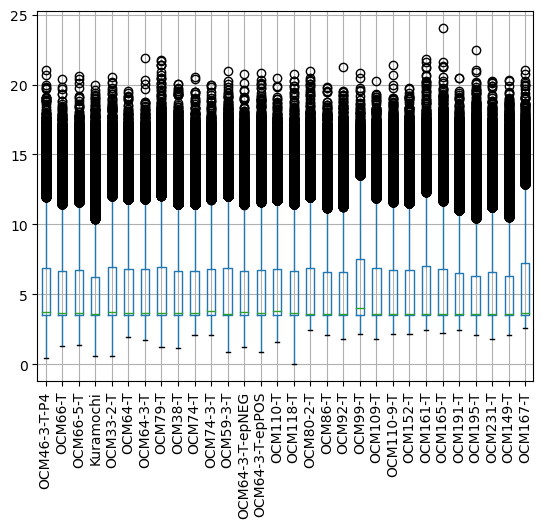

In [28]:
boxplot_4 = ocm.boxplot(column=ocms[0:30])
plt.xticks(rotation=90)
boxplot_4

<AxesSubplot:>

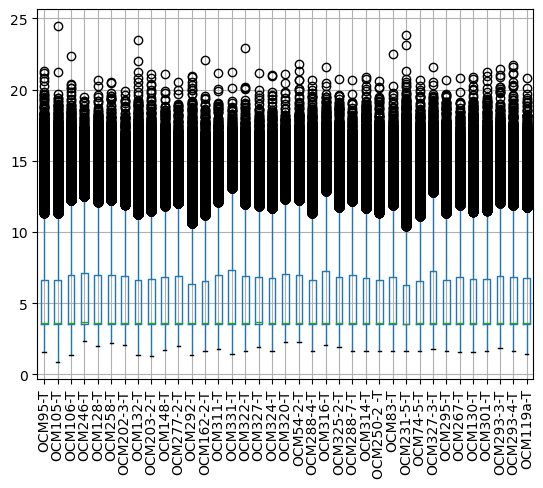

In [29]:
boxplot_5 = ocm.boxplot(column=ocms[30:])
plt.xticks(rotation=90)
boxplot_5

# ocm doubling times

In [32]:
times = pd.read_csv(r'/Users/katemeeson/Library/Mobile Documents/com~apple~CloudDocs/MRC-DTP_PhD_UoM/OCM_work/datasets/doubling_times_for_plot_no_controls.csv')
times

,ocm,avg_doubling_time,subtype
0,46-3,23.040,HGS
1,87,25.680,HGS - suspected lynch syndrome
2,79,30.793,HGS
3,38,35.770,HGS
4,195,36.380,NaN
5,64,38.170,HGS
6,152,39.120,NaN
7,105,39.430,NaN
8,72,39.387,MUC
9,66-5,43.883,HGS


In [36]:
times = times.iloc[:,0:2]

In [38]:
times

,ocm,avg_doubling_time
0,46-3,23.040
1,87,25.680
2,79,30.793
3,38,35.770
4,195,36.380
5,64,38.170
6,152,39.120
7,105,39.430
8,72,39.387
9,66-5,43.883


In [39]:
times['avg_doubling_time']

0      23.040
1      25.680
2      30.793
3      35.770
4      36.380
5      38.170
6      39.120
7      39.430
8      39.387
9      43.883
10     45.483
11     45.630
12     47.220
13     47.423
14     47.287
15     48.953
16     52.163
17     53.153
18     55.370
19     58.067
20     62.843
21     66.673
22     63.120
23     64.800
24     81.283
25     85.605
26     86.210
27    120.150
Name: avg_doubling_time, dtype: float64

In [48]:
ocm_n = ['slow','slow','slow','slow','slow','slow','slow','slow','slow','slow','slow','medium','medium','medium','medium','medium','medium','medium','medium','quick','quick','quick','quick','quick','quick']
slow = [38.17,45.63,47.22,47.423,52.163,55.37,62.843,63.12,85.605,86.21,120.15]
medium = [38.17,39.43,47.287,48.953,53.153,58.067,64.8,66.673]
quick = [30.793,35.77,36.38,39.12,43.883,45.483]
combined = [38.17,45.63,47.22,47.423,52.163,55.37,62.843,63.12,85.605,86.21,120.15,38.17,39.43,47.287,48.953,53.153,58.067,64.8,66.673,30.793,35.77,36.38,39.12,43.883,45.483]

In [70]:
sum(quick)/len(quick)

38.57150000000001

In [66]:
df = pd.DataFrame(columns = ['qualitative growth category (AT/LN)','doubling time (as recorded by Sam) (hours)'])
df['qualitative growth category (AT/LN)'] = ocm_n
df['doubling time (as recorded by Sam) (hours)'] = combined
df

,qualitative growth category (AT/LN),doubling time (as recorded by Sam) (hours)
0,slow,38.170
1,slow,45.630
2,slow,47.220
3,slow,47.423
4,slow,52.163
5,slow,55.370
6,slow,62.843
7,slow,63.120
8,slow,85.605
9,slow,86.210


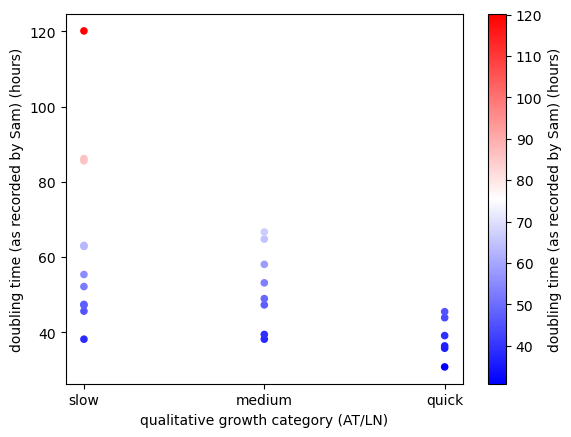

In [67]:
import matplotlib.cm as cm
df.plot.scatter(x = 'qualitative growth category (AT/LN)', y = 'doubling time (as recorded by Sam) (hours)', c = 'doubling time (as recorded by Sam) (hours)', cmap = cm.bwr)
plt.savefig('ocm_choosing_growth_cats.png',dpi=300)